In [1]:
import pandas as pd
df = pd.read_csv("Data/momq_posts_9052399_2.csv")
df

,artNo,title,content,datetime,board,category
0,9081481,몸에 좋은 아이스크림?,아이스크림 먹을 때마다 안좋은거 많이 들었을텐데\n이러면서 많이 먹었거든요 ㅎㅎ\n...,2025.06.19 22:07,일상수다방,일상수다
1,9081480,[ 신생아~12개월 ]\r\n\t\t\t\t\t 초기이유식 시판,"알레르기때문에 초기이유식 이제 쌀,고기 먹기시작했는데\n시판으로나온 바나나,사과,고...",2025.06.19 21:31,육아수다&꿀팁방,신생아~12개월
2,9081479,픽사 관람회 다녀왔어요.,딸램 어린이집 땡땡이 시키고\n몬스타주식회사의 부 처럼 입히고\n픽사 전시회 다녀왔...,2025.06.19 20:39,일상수다방,일상수다
3,9081478,운동하고 싶어요,#맘챌린지\n취미생활을 할 시간이 생기면 운동을 하고 싶네요\n지금은 시간 없다는 ...,2025.06.19 20:31,공감톡방,일상수다
4,9081477,비계삼겹살 ㅜㅜ,인터넷으로 삼겹살 주문하다보면 꼭 한번씩 저런 비께덩어리가 걸릴때가 있더라구용\n온...,2025.06.19 19:58,일상수다방,일상수다
...,...,...,...,...,...,...
29077,9052404,일춘기온 첫째 때문에 고되지만 투샷을 보면 행복합니다.,동생﻿이 태어난 이후로 일춘기가 온 27개월 첫째....\n야경증 증상까지오고 이유...,2023.09.11 11:41,일상수다방,일상수다
29078,9052403,고되지만 기운내 봅니다♡,﻿\n눈을 뜨고 밤에 잠이 들기까지 많은 일들이 있지만\n아이 웃는 모습에 힘들었던...,2023.09.11 11:22,일상수다방,일상수다
29079,9052402,"고단한 육아, 하지만 둘이라서 힘이 나요^^",﻿\n오늘 첫째아이 열감기로 병원에 다녀왔습니다.\n확실히 남편과 같이 갈때보다 신...,2023.09.11 10:51,일상수다방,일상수다
29080,9052401,육아중 가장 좋은시간..,저는...혼자있는 시간이요...오롯이 저한테 집중해서\n내가 하고싶은거..먹고싶은거...,2023.09.11 10:35,일상수다방,일상수다


In [2]:
df.groupby(["board", "category"], as_index=False).size()

,board,category,size
0,공감톡방,일상수다,3756
1,공지사항/이벤트방,일상수다,124
2,내돈내산 맘큐쇼핑리뷰,일상수다,327
3,무엇이든 쇼핑 Q&A,일상수다,149
4,육아수다&꿀팁방,13~24개월,1358
5,육아수다&꿀팁방,25~36개월,566
6,육아수다&꿀팁방,36개월 이상,1548
7,육아수다&꿀팁방,신생아~12개월,5018
8,육아수다&꿀팁방,임신준비/임산부,188
9,육아정보,일상수다,18


### 전체 데이터

In [7]:
from konlpy.tag import Okt
from collections import Counter

okt = Okt()

nouns_list = []

for content in df["content"].dropna():
    nouns = okt.nouns(content)
    nouns = [n for n in nouns if len(n) >= 2]
    nouns_list.extend(nouns)

# 빈도 분석
noun_counts = Counter(nouns_list)

# 상위 20개 단어 확인
print(noun_counts)

[('아이', 18143), ('아기', 14503), ('오늘', 9312), ('엄마', 6841), ('육아', 6155), ('시간', 5927), ('생각', 4616), ('우리', 4272), ('이제', 3605), ('개월', 3507), ('정말', 3405), ('남편', 3398), ('요즘', 3057), ('하루', 2866), ('지금', 2849), ('고민', 2823), ('진짜', 2686), ('아가', 2619), ('시작', 2616), ('하나', 2528)]


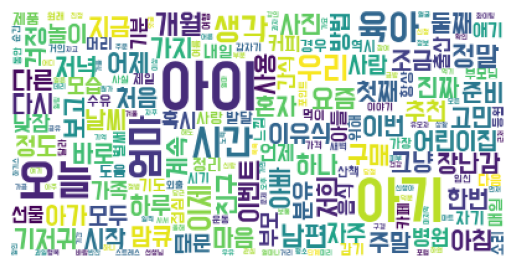

In [11]:
# !pip install wordcloud
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white",
               font_path = "Data/BMDOHYEON_ttf.ttf").generate_from_frequencies(noun_counts)

plt.imshow(wc)
plt.axis("off")
plt.show()

### 신생아~12개월 

In [9]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 데이터 불러오기
df = pd.read_csv("Data/momq_posts_9052399_2.csv")

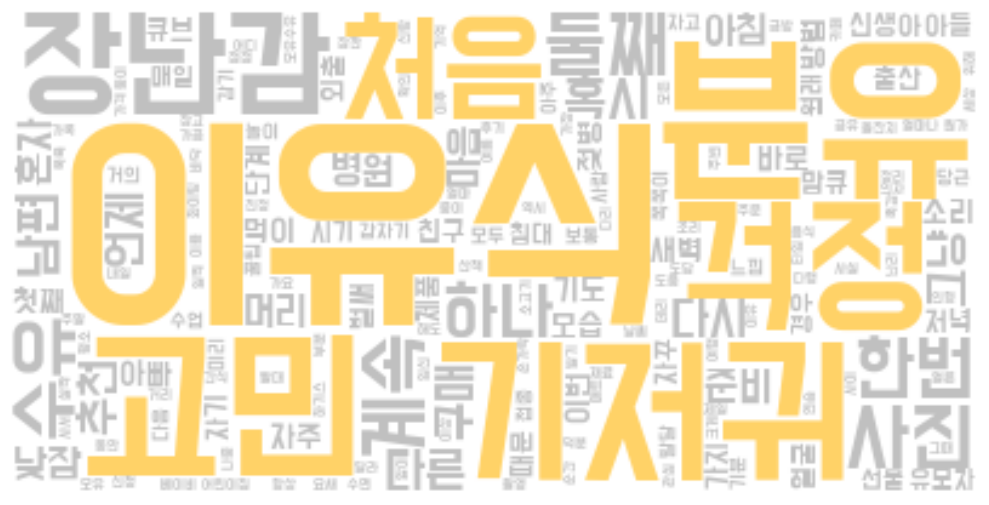

In [31]:
df_filtered = df[df["category"] == "신생아~12개월"]

# 형태소 분석기
okt = Okt()

# 불용어 정의
stopwords = {'아이', '아기', '아가', "애기", "오늘", "개월", "엄마", "우리", "요즘", "이제", "시간", "생각", 
             "시작", "육아", "지금", "정도", "사용", "하루", "저희", "정말", "조금", "어제", "진짜", "보고"}

# 명사 추출 + 2글자 이상 + 불용어 제외
nouns_list = []
for content in df_filtered["content"].dropna():
    nouns = okt.nouns(content)
    nouns = [n for n in nouns if len(n) >= 2 and n not in stopwords]
    nouns_list.extend(nouns)

# 빈도 분석
noun_counts = Counter(nouns_list)

# 중요 단어 기준 빈도
min_visible_freq = 500

# 색상 함수: 주황색(중요), 회색(덜 중요)
def custom_color_func(word, font_size, position, orientation, font_path, random_state):
    if noun_counts[word] < min_visible_freq:
        return "#C0C0C0"  # 회색
    else:
        return '#FFD267'  # 주황색

# 워드클라우드 생성
wc = WordCloud(
    background_color="white",
    font_path="Data/BMDOHYEON_ttf.ttf",
    color_func=custom_color_func
).generate_from_frequencies(noun_counts)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

### 13~24개월 

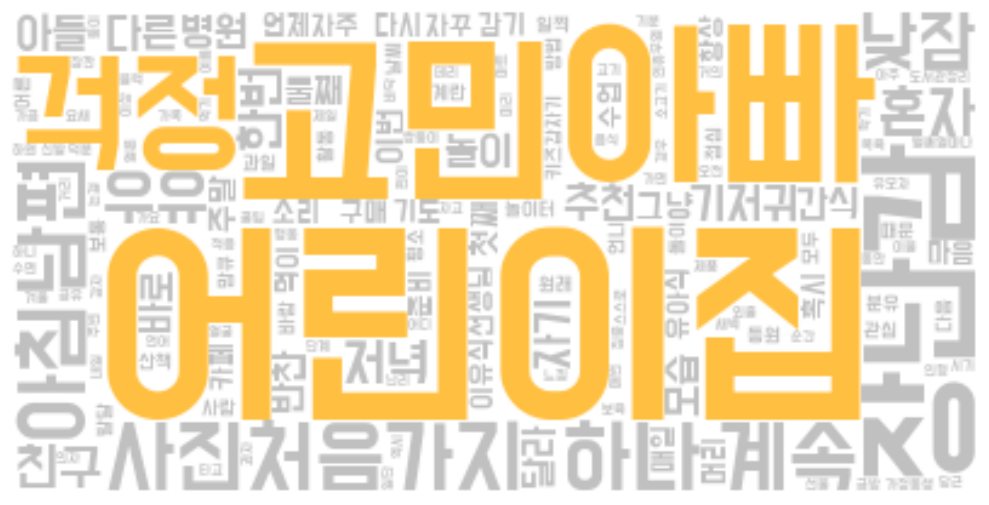

In [32]:
df_filtered = df[df["category"] == "13~24개월"]

# 형태소 분석기
okt = Okt()

# 불용어 정의
stopwords = {'아이', '아기', '아가', "애기", "오늘", "개월", "엄마", "우리", "요즘", "이제", "시간", "생각", 
             "시작", "육아", "지금", "정도", "사용", "하루", "저희", "정말", "조금", "어제", "진짜", "보고"}

# 명사 추출 + 2글자 이상 + 불용어 제외
nouns_list = []
for content in df_filtered["content"].dropna():
    nouns = okt.nouns(content)
    nouns = [n for n in nouns if len(n) >= 2 and n not in stopwords]
    nouns_list.extend(nouns)

# 빈도 분석
noun_counts = Counter(nouns_list)

# 중요 단어 기준 빈도
min_visible_freq = 145

# 색상 함수: 주황색(중요), 회색(덜 중요)
def custom_color_func(word, font_size, position, orientation, font_path, random_state):
    if noun_counts[word] < min_visible_freq:
        return "#C0C0C0"  # 회색
    else:
        return "#FFC041"  # 주황색

# 워드클라우드 생성
wc = WordCloud(
    background_color="white",
    font_path="Data/BMDOHYEON_ttf.ttf",
    color_func=custom_color_func
).generate_from_frequencies(noun_counts)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

### 25~36개월 

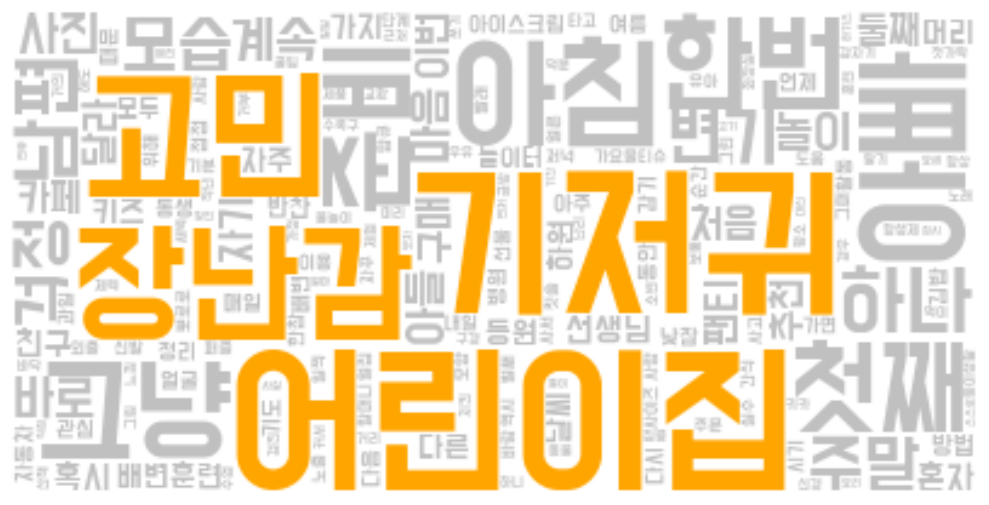

In [21]:
df_filtered = df[df["category"] == "25~36개월"]

# 형태소 분석기
okt = Okt()

# 불용어 정의
stopwords = {'아이', '아기', '아가', "애기", "오늘", "개월", "엄마", "우리", "요즘", "이제", "시간", "생각", 
             "시작", "육아", "지금", "정도", "사용", "하루", "저희", "정말", "조금", "어제", "진짜", "보고"}

# 명사 추출 + 2글자 이상 + 불용어 제외
nouns_list = []
for content in df_filtered["content"].dropna():
    nouns = okt.nouns(content)
    nouns = [n for n in nouns if len(n) >= 2 and n not in stopwords]
    nouns_list.extend(nouns)

# 빈도 분석
noun_counts = Counter(nouns_list)

# 중요 단어 기준 빈도
min_visible_freq = 70

# 색상 함수: 주황색(중요), 회색(덜 중요)
def custom_color_func(word, font_size, position, orientation, font_path, random_state):
    if noun_counts[word] < min_visible_freq:
        return "#C0C0C0"  # 회색
    else:
        return "#FFA500"  # 주황색

# 워드클라우드 생성
wc = WordCloud(
    background_color="white",
    font_path="Data/BMDOHYEON_ttf.ttf",
    color_func=custom_color_func
).generate_from_frequencies(noun_counts)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

### 36개월 이상

In [23]:
noun_counts

Counter({'어린이집': 288,
         '고민': 216,
         '아빠': 186,
         '꼬맹이': 168,
         '첫째': 162,
         '사진': 152,
         '친구': 147,
         '아침': 140,
         '아들': 138,
         '이번': 133,
         '놀이': 130,
         '주말': 130,
         '하나': 125,
         '추천': 122,
         '한번': 120,
         '둘째': 118,
         '걱정': 118,
         '가지': 115,
         '선물': 111,
         '혼자': 109,
         '저녁': 108,
         '준비': 101,
         '장난감': 101,
         '계속': 100,
         '자기': 99,
         '하원': 93,
         '체험': 92,
         '유치원': 92,
         '등원': 90,
         '다시': 88,
         '놀이터': 85,
         '정리': 82,
         '처음': 81,
         '모습': 81,
         '마음': 81,
         '활동': 81,
         '남편': 80,
         '선생님': 80,
         '키즈': 79,
         '달라': 77,
         '다른': 77,
         '언제': 74,
         '그냥': 74,
         '반찬': 73,
         '자주': 73,
         '사람': 72,
         '간식': 70,
         '퍼즐': 70,
         '날씨': 69,
         '수업': 69,
         '바로': 67,


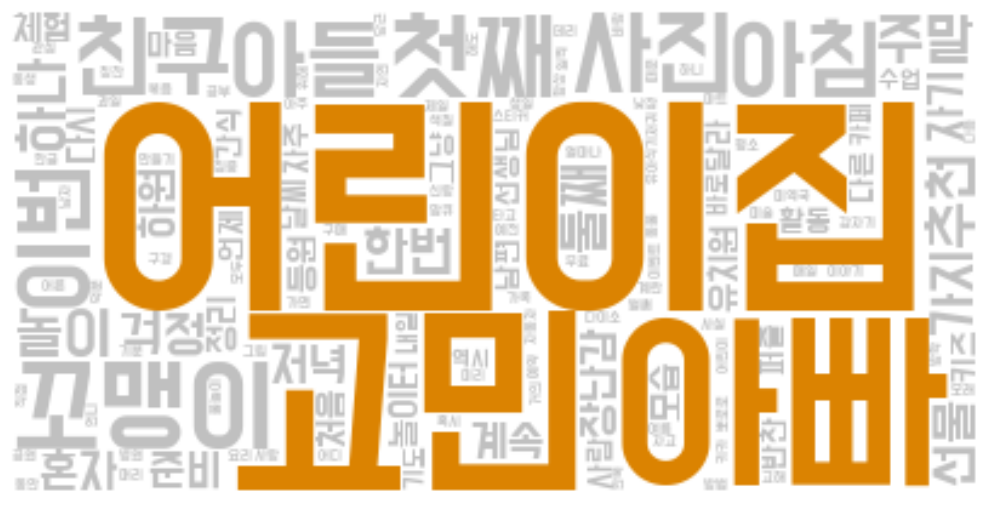

In [33]:
df_filtered = df[df["category"] == "36개월 이상"]

# 형태소 분석기
okt = Okt()

# 불용어 정의
stopwords = {'아이', '아기', '아가', "애기", "오늘", "개월", "엄마", "우리", "요즘", "이제", "시간", "생각", 
             "시작", "육아", "지금", "정도", "사용", "하루", "저희", "정말", "조금", "어제", "진짜", "보고"}

# 명사 추출 + 2글자 이상 + 불용어 제외
nouns_list = []
for content in df_filtered["content"].dropna():
    nouns = okt.nouns(content)
    nouns = [n for n in nouns if len(n) >= 2 and n not in stopwords]
    nouns_list.extend(nouns)

# 빈도 분석
noun_counts = Counter(nouns_list)

# 중요 단어 기준 빈도
min_visible_freq = 170

# 색상 함수: 주황색(중요), 회색(덜 중요)
def custom_color_func(word, font_size, position, orientation, font_path, random_state):
    if noun_counts[word] < min_visible_freq:
        return "#C0C0C0"  # 회색
    else:
        return "#DB8301"  # 주황색

# 워드클라우드 생성
wc = WordCloud(
    background_color="white",
    font_path="Data/BMDOHYEON_ttf.ttf",
    color_func=custom_color_func
).generate_from_frequencies(noun_counts)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

In [35]:
noun_counts

Counter({'임신': 147,
         '출산': 132,
         '둘째': 82,
         '병원': 69,
         '첫째': 54,
         '임산부': 50,
         '남편': 50,
         '준비': 43,
         '신청': 38,
         '고민': 36,
         '검사': 32,
         '참여': 31,
         '선택': 31,
         '카페': 30,
         '미션': 30,
         '조리': 30,
         '수술': 29,
         '이상': 28,
         '기간': 27,
         '걱정': 27,
         '이벤트': 27,
         '선물': 27,
         '이번': 25,
         '사람': 24,
         '처음': 24,
         '수유': 24,
         '손목': 24,
         '마음': 22,
         '댓글': 22,
         '제왕절개': 22,
         '맘스': 21,
         '도움': 21,
         '입덧': 20,
         '물건': 20,
         '다시': 20,
         '지원': 19,
         '무료': 19,
         '하나': 19,
         '젖병': 19,
         '가지': 18,
         '보건소': 18,
         '바로': 18,
         '필수': 18,
         '가장': 18,
         '산모': 17,
         '한번': 17,
         '추천': 17,
         '산부인과': 17,
         '당첨': 17,
         '진통': 17,
         '때문': 17,
         '제왕': 17,
   

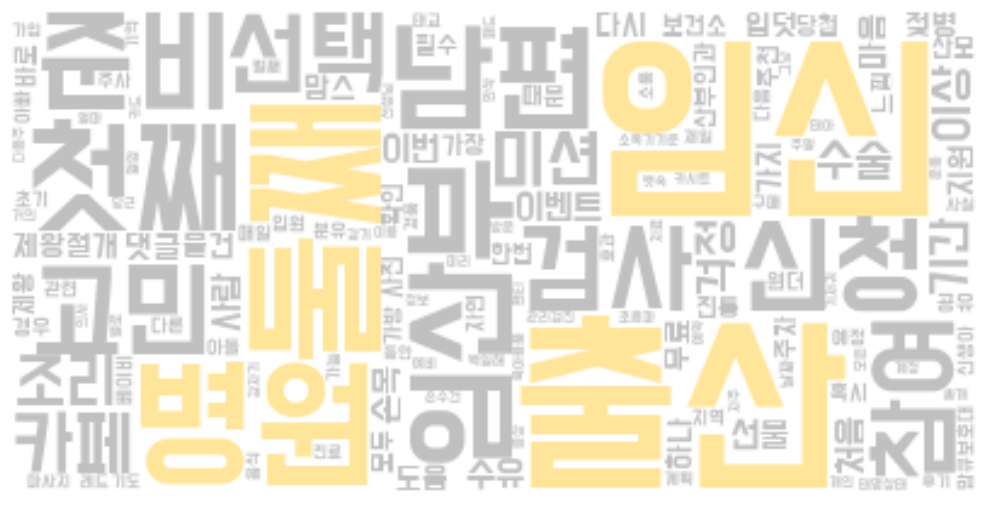

In [36]:
df_filtered = df[df["category"] == "임신준비/임산부"]

# 형태소 분석기
okt = Okt()

# 불용어 정의
stopwords = {'아이', '아기', '아가', "애기", "오늘", "개월", "엄마", "우리", "요즘", "이제", "시간", "생각", 
             "시작", "육아", "지금", "정도", "사용", "하루", "저희", "정말", "조금", "어제", "진짜", "보고"}

# 명사 추출 + 2글자 이상 + 불용어 제외
nouns_list = []
for content in df_filtered["content"].dropna():
    nouns = okt.nouns(content)
    nouns = [n for n in nouns if len(n) >= 2 and n not in stopwords]
    nouns_list.extend(nouns)

# 빈도 분석
noun_counts = Counter(nouns_list)

# 중요 단어 기준 빈도
min_visible_freq = 60

# 색상 함수: 주황색(중요), 회색(덜 중요)
def custom_color_func(word, font_size, position, orientation, font_path, random_state):
    if noun_counts[word] < min_visible_freq:
        return "#C0C0C0"  # 회색
    else:
        return '#FFE599'  # 주황색

# 워드클라우드 생성
wc = WordCloud(
    background_color="white",
    font_path="Data/BMDOHYEON_ttf.ttf",
    color_func=custom_color_func
).generate_from_frequencies(noun_counts)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

## 육아수다&꿀팁방 전체 (신생아~12개월, 13~24개월, 25~36개월, 36개월 이상, 임신준비/임산부)

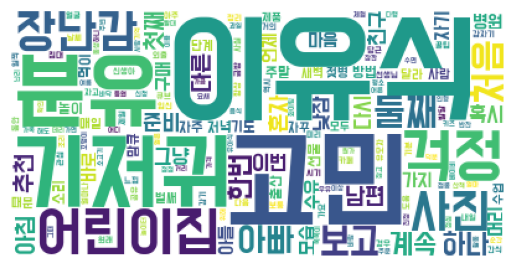

In [26]:
df_filtered = df[df["board"] == "육아수다&꿀팁방"]

okt = Okt()

# 불용어 정의
stopwords = {'아이', '아기', '아가', "애기", "오늘", "개월", "엄마", "우리", "요즘", "이제", "시간", "생각", 
             "시작", "육아", "지금", "정도", "사용", "하루", "저희", "정말", "조금", "어제", "진짜"}

# 명사 추출 + 2글자 이상 + 불용어 제외
nouns_list = []
for content in df_filtered["content"].dropna():
    nouns = okt.nouns(content)
    nouns = [n for n in nouns if len(n) >= 2 and n not in stopwords]
    nouns_list.extend(nouns)

# 빈도 분석
noun_counts = Counter(nouns_list)

wc = WordCloud(
    background_color="white",
    font_path="Data/BMDOHYEON_ttf.ttf"
).generate_from_frequencies(noun_counts)

plt.imshow(wc)
plt.axis("off")
plt.show()

# 트렌드분석내용최대한많이도출 

In [27]:
pd.DataFrame(df.groupby(["board", "category"]).size())

0
board       category       
공감톡방        일상수다       3756
공지사항/이벤트방   일상수다        124
내돈내산 맘큐쇼핑리뷰 일상수다        327
무엇이든 쇼핑 Q&A 일상수다        149
육아수다&꿀팁방    13~24개월    1358
            25~36개월     566
            36개월 이상    1548
            신생아~12개월   5018
            임신준비/임산부    188
육아정보        일상수다         18
육아포럼        일상수다          4
육아포럼 이벤트    일상수다        343
일상수다방       일상수다      13915
전문가 상담방     RE           94
            일상수다        200

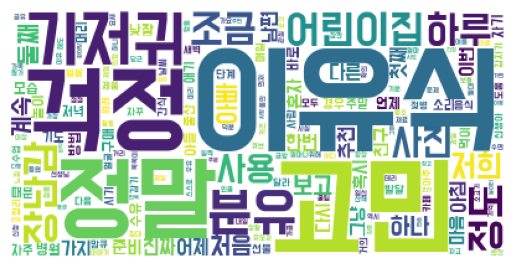

In [83]:
df_filtered = df[df["category"] != "일상수다"]

okt = Okt()

# 불용어 정의
stopwords = {'아이', '아기', '아가', "오늘", "개월", "엄마", "우리", "요즘", "이제", "시간", "생각", "시작", "육아", "지금"}

# 명사 추출 + 2글자 이상 + 불용어 제외
nouns_list = []
for content in df_filtered["content"].dropna():
    nouns = okt.nouns(content)
    nouns = [n for n in nouns if len(n) >= 2 and n not in stopwords]
    nouns_list.extend(nouns)

# 빈도 분석
noun_counts = Counter(nouns_list)

wc = WordCloud(
    background_color="white",
    font_path="Data/BMDOHYEON_ttf.ttf"
).generate_from_frequencies(noun_counts)

plt.imshow(wc)
plt.axis("off")
plt.show()

## 감성분석

In [37]:
import json
import pandas as pd

with open('Data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f: 
  SentiWord_info = json.load(f)

sentiword_dic = pd.DataFrame(SentiWord_info)

In [38]:
sentiword_dic

,word,word_root,polarity
0,(-;,(,1
1,(;_;),(;_;),-1
2,(^^),(^^),1
3,(^-^),(^-^),1
4,(^^*,(,1
...,...,...,...
14838,반신반의하다,반신반의,0
14839,신비롭다,신비,1
14840,아리송하다,아리송,-1
14841,알쏭하다,알쏭하,-1


In [39]:
import pandas as pd
import re
from konlpy.tag import Okt
import json

# 1. 감성 사전 로딩
with open('Data/SentiWord_info.json', encoding='utf-8-sig') as f:
    senti_data = json.load(f)
sentiword_dic = pd.DataFrame(senti_data)

# 2. 감성 사전 정제
sentiword_dic = sentiword_dic[['word', 'polarity']].dropna()
sentiword_dic['polarity'] = sentiword_dic['polarity'].astype(int)  # <- 여기 추가
senti_dict = dict(zip(sentiword_dic['word'], sentiword_dic['polarity']))

# 3. 텍스트 전처리
def clean_text(text):
    return re.sub(r'[^가-힣\s]', '', str(text))  # 한글 + 공백만 유지

# 4. 감성 점수 계산 함수
okt = Okt()

def get_sentiment_score(text):
    text = clean_text(text)
    tokens = [word for word, tag in okt.pos(text, stem=True)]
    score = sum([senti_dict.get(token, 0) for token in tokens])
    return score

# 5. 감정 점수 및 레이블 적용 (df는 게시글 데이터프레임)
df['clean_content'] = df['content'].fillna('').apply(clean_text)
df['sentiment_score'] = df['clean_content'].apply(get_sentiment_score)
df['sentiment'] = df['sentiment_score'].apply(lambda x: '긍정' if x > 0 else ('부정' if x < 0 else '중립'))

# 6. 감정 분포 확인
print(df['sentiment'].value_counts())

sentiment
긍정    16818
부정     7467
중립     4797
Name: count, dtype: int64


In [33]:
df.loc[df["board"] == "육아수다&꿀팁방", "sentiment"].value_counts()

sentiment
긍정    4971
부정    2660
중립    1047
Name: count, dtype: int64

In [44]:
df.loc[df["category"] == "임신준비/임산부", "sentiment"].value_counts()

sentiment
긍정    116
부정     50
중립     22
Name: count, dtype: int64

In [59]:
# 1. 조건: 카테고리가 '임신준비/임산부'인 글
df_pregnancy = df[df["category"] == "36개월 이상"].copy()

# 2. 핵심 키워드 정의
keywords = ['어린이집', '아빠']
# keywords = ['기저귀', '어린이집', '장난감']

# 3. 키워드 포함 여부 필터링
keyword_mask = df_pregnancy['content'].fillna('').apply(lambda x: any(k in x for k in keywords))
df_filtered = df_pregnancy[keyword_mask].copy()

# 4. 텍스트 정제 및 감정 점수 계산
df_filtered['clean_content'] = df_filtered['content'].fillna('').apply(clean_text)
df_filtered['sentiment_score'] = df_filtered['clean_content'].apply(get_sentiment_score)
df_filtered['sentiment'] = df_filtered['sentiment_score'].apply(lambda x: '긍정' if x > 0 else ('부정' if x < 0 else '중립'))

# 5. 감정 분포 출력
print(df_filtered['sentiment'].value_counts())

sentiment
긍정    179
부정     73
중립     21
Name: count, dtype: int64


In [60]:
print(179/(179+73+21)*100, 73/(179+73+21)*100)

65.56776556776556 26.73992673992674


In [38]:
df.groupby(["board", "category"]).size()

board        category
공감톡방         일상수다         3756
공지사항/이벤트방    일상수다          124
내돈내산 맘큐쇼핑리뷰  일상수다          327
무엇이든 쇼핑 Q&A  일상수다          149
육아수다&꿀팁방     13~24개월      1358
             25~36개월       566
             36개월 이상      1548
             신생아~12개월     5018
             임신준비/임산부      188
육아정보         일상수다           18
육아포럼         일상수다            4
육아포럼 이벤트     일상수다          343
일상수다방        일상수다        13915
전문가 상담방      RE             94
             일상수다          200
dtype: int64

In [68]:
df

,artNo,title,content,datetime,board,category,clean_content,sentiment_score,sentiment
0,9081481,몸에 좋은 아이스크림?,아이스크림 먹을 때마다 안좋은거 많이 들었을텐데\n이러면서 많이 먹었거든요 ㅎㅎ\n...,2025.06.19 22:07,일상수다방,일상수다,아이스크림 먹을 때마다 안좋은거 많이 들었을텐데\n이러면서 많이 먹었거든요 \n끊을...,-4,부정
1,9081480,[ 신생아~12개월 ]\r\n\t\t\t\t\t 초기이유식 시판,"알레르기때문에 초기이유식 이제 쌀,고기 먹기시작했는데\n시판으로나온 바나나,사과,고...",2025.06.19 21:31,육아수다&꿀팁방,신생아~12개월,알레르기때문에 초기이유식 이제 쌀고기 먹기시작했는데\n시판으로나온 바나나사과고구마 ...,0,중립
2,9081479,픽사 관람회 다녀왔어요.,딸램 어린이집 땡땡이 시키고\n몬스타주식회사의 부 처럼 입히고\n픽사 전시회 다녀왔...,2025.06.19 20:39,일상수다방,일상수다,딸램 어린이집 땡땡이 시키고\n몬스타주식회사의 부 처럼 입히고\n픽사 전시회 다녀왔...,1,긍정
3,9081478,운동하고 싶어요,#맘챌린지\n취미생활을 할 시간이 생기면 운동을 하고 싶네요\n지금은 시간 없다는 ...,2025.06.19 20:31,공감톡방,일상수다,맘챌린지\n취미생활을 할 시간이 생기면 운동을 하고 싶네요\n지금은 시간 없다는 핑...,1,긍정
4,9081477,비계삼겹살 ㅜㅜ,인터넷으로 삼겹살 주문하다보면 꼭 한번씩 저런 비께덩어리가 걸릴때가 있더라구용\n온...,2025.06.19 19:58,일상수다방,일상수다,인터넷으로 삼겹살 주문하다보면 꼭 한번씩 저런 비께덩어리가 걸릴때가 있더라구용\n온...,-1,부정
...,...,...,...,...,...,...,...,...,...
29077,9052404,일춘기온 첫째 때문에 고되지만 투샷을 보면 행복합니다.,동생﻿이 태어난 이후로 일춘기가 온 27개월 첫째....\n야경증 증상까지오고 이유...,2023.09.11 11:41,일상수다방,일상수다,동생이 태어난 이후로 일춘기가 온 개월 첫째\n야경증 증상까지오고 이유없는 떼울음화...,-8,부정
29078,9052403,고되지만 기운내 봅니다♡,﻿\n눈을 뜨고 밤에 잠이 들기까지 많은 일들이 있지만\n아이 웃는 모습에 힘들었던...,2023.09.11 11:22,일상수다방,일상수다,\n눈을 뜨고 밤에 잠이 들기까지 많은 일들이 있지만\n아이 웃는 모습에 힘들었던 ...,-1,부정
29079,9052402,"고단한 육아, 하지만 둘이라서 힘이 나요^^",﻿\n오늘 첫째아이 열감기로 병원에 다녀왔습니다.\n확실히 남편과 같이 갈때보다 신...,2023.09.11 10:51,일상수다방,일상수다,\n오늘 첫째아이 열감기로 병원에 다녀왔습니다\n확실히 남편과 같이 갈때보다 신경쓸...,2,긍정
29080,9052401,육아중 가장 좋은시간..,저는...혼자있는 시간이요...오롯이 저한테 집중해서\n내가 하고싶은거..먹고싶은거...,2023.09.11 10:35,일상수다방,일상수다,저는혼자있는 시간이요오롯이 저한테 집중해서\n내가 하고싶은거먹고싶은거 본능을 다 죽...,4,긍정


In [84]:
df2 = df.sort_values("sentiment_score", ascending=False).reset_index(drop=True)
df2

,artNo,title,content,datetime,board,category,clean_content,sentiment_score,sentiment
0,9065502,"남매, 형제, 자매끼리 다툼, 부모의 행동과 역할은? (+이벤트 당첨자 발표)",안녕하세요 여러분 큐맘이에요\n😊\n댓글로 전문가에게 직접 육아 궁금증을\n물어볼 ...,2024.08.26 14:49,전문가 상담방,일상수다,안녕하세요 여러분 큐맘이에요\n\n댓글로 전문가에게 직접 육아 궁금증을\n물어볼 수...,128,긍정
1,9057900,끝없는 놀이고민에 빠진 엄빠를 구출할 전문가 솔루션 A to Z,안녕하세요 여러분\n~!\n큐맘이에요\n😊\n전문가에게 직접 육아 궁금증을 묻고 솔...,2024.03.29 08:16,전문가 상담방,일상수다,안녕하세요 여러분\n\n큐맘이에요\n\n전문가에게 직접 육아 궁금증을 묻고 솔루션을...,112,긍정
2,9076593,#항상응원해,#항상응원해\n이제 새로운 출발을 맞이하게 되었구나! 유치원에 가는 날이 왔다는 걸...,2025.03.12 21:14,공감톡방,일상수다,항상응원해\n이제 새로운 출발을 맞이하게 되었구나 유치원에 가는 날이 왔다는 걸 생...,103,긍정
3,9053972,○●129회 육아포럼후기○●,﻿\n﻿\n﻿\n﻿\n﻿\n﻿\nhttps://www.youtube.com/live...,2023.11.08 14:37,공감톡방,일상수다,\n\n\n\n\n\n\n아직 안보셨다면 강추합니다\n\n\n반갑습니다\n회 육아 ...,102,긍정
4,9053662,[당첨자 발표] 아이와 함께 떠나기 좋은 가을 나들이 장소 추천해주세요! 🍁,"안녕하세요\n여러분\n,\n큐맘이에요\n.\n😘\n많은 분들이 공유해 주신 가을 나...",2023.10.31 16:45,공지사항/이벤트방,일상수다,안녕하세요\n여러분\n\n큐맘이에요\n\n\n많은 분들이 공유해 주신 가을 나들이 ...,102,긍정
...,...,...,...,...,...,...,...,...,...
29077,9078825,[RE] 40개월 아이 밥을 잘 먹은 적이 없어요ㅠ,"40\n개월에 먹어야 하는 음식에 대한 관심이 별로 없는 우리 아이\n,\n걱정이 ...",2025.04.24 11:12,전문가 상담방,RE,\n개월에 먹어야 하는 음식에 대한 관심이 별로 없는 우리 아이\n\n걱정이 많이 ...,-33,부정
29078,9076713,아기가 다치거나 아플까봐 지나치게 예민해져요..,안녕하세요 6개월 남자 아기 키우고 있는 엄마입니다.\n저는 아기가 다치거나 아픈거...,2025.03.14 22:17,전문가 상담방,일상수다,안녕하세요 개월 남자 아기 키우고 있는 엄마입니다\n저는 아기가 다치거나 아픈거에 ...,-33,부정
29079,9075567,"소아 중이염, 방치하면 안 돼요! 원인부터 예방법까지 총정리","소아 중이염\n,\n생각보다 흔한 질환이라는 사실 알고 계셨나요\n?\n3\n세 이...",NaN,육아정보,일상수다,소아 중이염\n\n생각보다 흔한 질환이라는 사실 알고 계셨나요\n\n\n세 이하 아...,-40,부정
29080,9054883,[ 신생아~12개월 ]\r\n\t\t\t\t\t 연년생 가정보육 할 수 있을까요? ...,﻿\n맘큐 커뮤니티분들 잘 지내셨어요???!\n저는 둘째 출산하고 산후조리 잘 하고...,2023.12.13 00:25,육아수다&꿀팁방,신생아~12개월,\n맘큐 커뮤니티분들 잘 지내셨어요\n저는 둘째 출산하고 산후조리 잘 하고\n둘째아...,-50,부정


In [87]:
df2.loc[29081, "clean_content"]

'아이들이 다리가 아픈 문제로 고민이신 분들이 많네요\n\n다른 분들도 이 답글을 통해 도움이 되셨으면 좋겠습니다\n\n아이들이 다리가 아프면 이게 성장통인지\n\n어디 다친 건 아닌지\n\n꾀병은 아닌지 궁금하고 어떻게 대처해야 하는지 고민이 되시죠\n\n그래서 이 세 경우를 구분하는 방법과 대처법을 알려드리겠습니다\n\n\n성장통 가능성이 높은 경우\n성장기인 만\n\n세에 많이 호소합니다\n\n특이하게 낮보다는 저녁에 아프다고 호소합니다\n\n\n양 쪽 모두\n\n아픕니다\n\n무리하게 신체 활동을 한 날 더욱 악화되는 특징이 있습니다\n\n마사지를 해주면 쉽게 호전되고는 합니다\n\n\n부상의 가능성이 높은 경우\n한 쪽만 통증을 호소할 수 있습니다\n\n이 때문에 한쪽 다리만 쓰려고 하는 모습이 관찰됩니다\n\n관절이나 근육이 빨갛게 부어 오릅니다\n\n관절을 굽히거나 펴는데 어려움이 있습니다\n\n눌렀을 때 오히려 아파합니다\n\n시간에 상관없이 아픕니다\n\n\n심리적인 요인이 큰 경우\n부상을 의심할만한\n\n의 증상이 없습니다\n\n신체 활동과 상관없이\n\n심리적인 불편감이 있는 상황에서 통증을 호소합니다\n\n기분이 좋거나 즐거운 활동을 할 때에는 불편감이 없습니다\n\n잠을 잘 잡니다\n\n이 정도면 충분히 아이 통증의 원인을 구분할 수 있습니다\n\n그럼 각 원인 별로 대처법도 알아볼까요\n\n\n성장통\n통증을 호소할 땐 마사지를 해주거나\n\n따뜻한 물로 목욕하고\n\n온찜질을 해주세요\n\n통증이 너무 심할 땐 해열진통제\n\n아세트 아미노펜\n\n이부프로펜 등\n\n를 복용하는 것이 도움이 됩니다\n\n다리만 과도하게 사용하는 신체활동은 쉬고\n\n전신을 골고루 사용하는 신체활동을 해주세요\n\n만약 통증이 너무 심하고 잘 해소가 되지 않은 경우에는 병원에서 진료가 필요할 수 있습니다\n\n\n부상이 의심되는 경우\n병원에서 진료가 필요합니다\n\n\n심리적인 요인으로 통증을 호소하는 경우\n심리적으로 힘든 점이 있을 때 머리나 

In [72]:
df.loc[df["category"] == "일상수다", "sentiment"].value_counts()

sentiment
긍정    11786
부정     4775
중립     2275
Name: count, dtype: int64